In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
# import the dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [43]:
# print(iris['DESCR'])
# Independent features
X = pd.DataFrame(iris['data'], columns=[
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)' 
    ]
)
y = iris['target']

In [44]:
# Convert X to DataFrame if it's a NumPy array
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

# Convert y to DataFrame or Series if it's a NumPy array
if isinstance(y, np.ndarray):
    y = pd.Series(y, name="target")

# Now concatenate them
dataset = pd.concat([X, y], axis=1)

dataset.to_csv('./data/data.csv', index=False)


In [45]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# train this model here
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

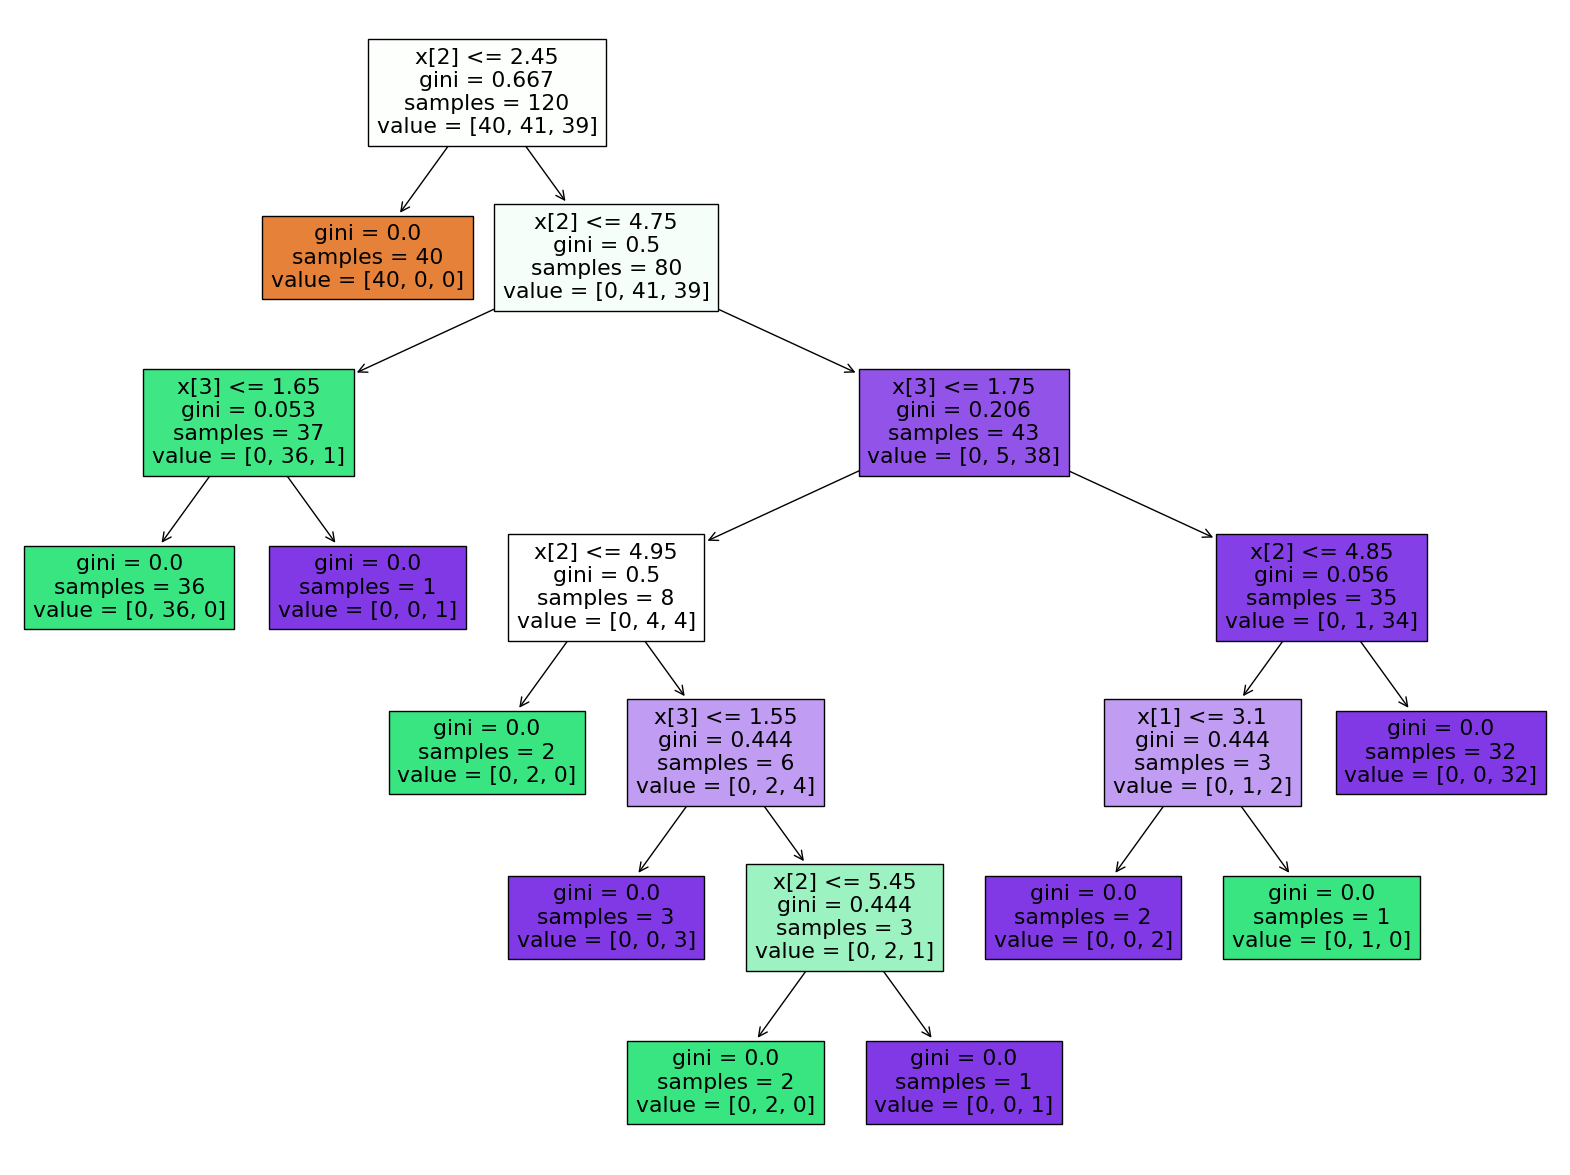

In [47]:
from sklearn import tree
plt.figure(figsize=(20, 15))
tree.plot_tree(classifier, filled=True, impurity=True)
plt.show()

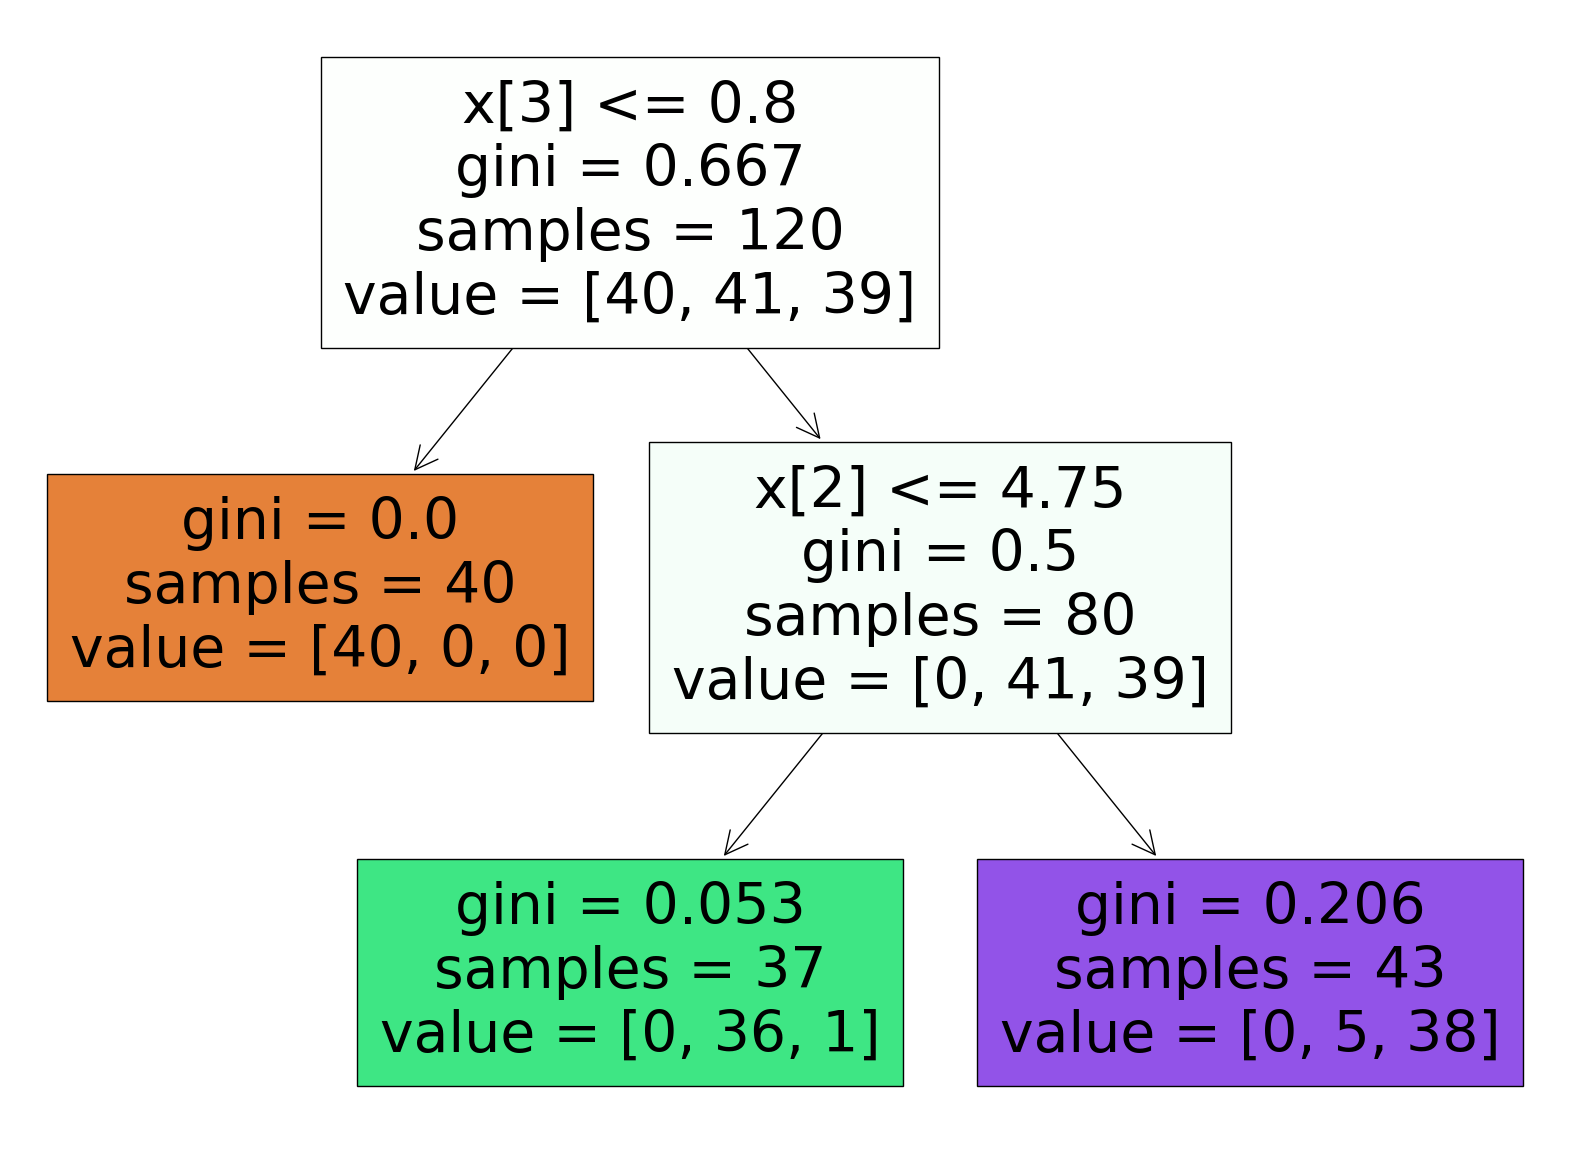

In [48]:
# Here We do the post purning
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)
plt.figure(figsize=(20, 15))
tree.plot_tree(classifier, filled=True, impurity=True)
plt.show()

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [51]:
target = classifier.predict([[6.3,3.3,6.0,5.88]])

# add switch case here
match target:
    case 0:
        label = "Setosa"
    case 1:
        label = "Versicolor"
    case 2:
        label = "Virginica"
    case _:
        label = "Unknown"
        
print(f"Predicted Class: {label}")


Predicted Class: Virginica


# Make a pickle file here

In [52]:
# Save the trained model to a pickle file
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(classifier, file)

print("Model saved successfully as 'model.pkl'!")

Model saved successfully as 'model.pkl'!


In [53]:
# Load the saved model
with open("model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make a prediction
sample = [[5.7,2.9,4.2,1.3]]
predicted_class = loaded_model.predict(sample)[0]

print(f"Predicted Class: {iris.target_names[predicted_class]}")


Predicted Class: versicolor


# Hyper Parameter Tuning

In [54]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3,4,5],
    "max_features": ["sqrt", "log2", "auto"]
}

In [55]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = DecisionTreeClassifier()
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    n_jobs= -1,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [56]:
grid.best_estimator_
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [57]:
grid.best_score_

0.95

In [58]:
y_pred = grid.predict(X_test)

In [59]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [61]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average='macro')

1.0